In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [49]:
CUTOFF = 400000

In [77]:
def get_xs_and_ys(name: str):
    df = pd.read_csv(f"L_1_30/{name}.csv")
    xs = df[df["jolt"] < CUTOFF]["time"]
    ys = df[df["jolt"] < CUTOFF]["jolt"]
    return xs, ys

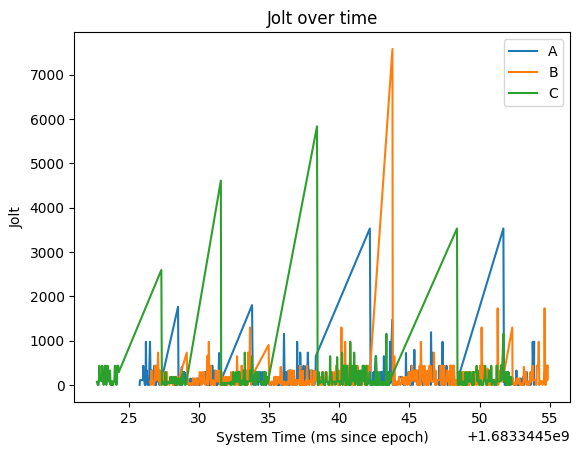

In [78]:
for name in ["A", "B", "C"]:
    xs, ys = get_xs_and_ys(name)
    xs = xs[500:10000]
    ys = ys[500:10000]
    plt.plot(xs, ys, label=name)

plt.legend()
plt.xlabel("System Time (ms since epoch)")
plt.ylabel("Jolt")
plt.title("Jolt over time")
plt.show()

In [57]:
def get_average_jolt(dir: str):
    sum = 0
    count = 0
    for name in ["A", "B", "C"]:
        df = pd.read_csv(f"{dir}/{name}.csv")
        sum += df[(df["jolt"] > 0) & (df["jolt"] < CUTOFF)].sum()["jolt"]
        count += df[(df["jolt"] > 0) & (df["jolt"] < CUTOFF)].count()["jolt"]
    return sum / count

In [69]:
print(get_average_jolt("L_1_10"))
print(get_average_jolt("L_1_14"))
print(get_average_jolt("L_1_20"))
print(get_average_jolt("L_1_30"))
print(get_average_jolt("L_1_50"))
print(get_average_jolt("L_1_60"))

1743.0625490564044
924.1489837978091
408.60907212266846
232.92906550219703
197.29898926159197
171.92625892945964


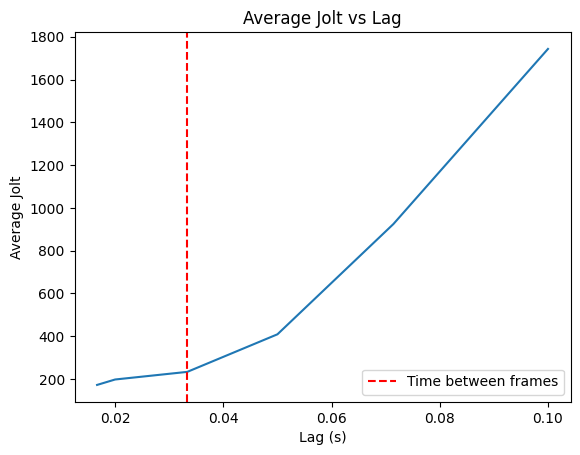

In [70]:
xs = [1.0 / x for x in [10, 14, 20, 30, 50, 60]]
ys = [get_average_jolt(f"L_1_{x}") for x in [10, 14, 20, 30, 50, 60]]
plt.plot(xs, ys)
plt.xlabel("Lag (s)")
plt.ylabel("Average Jolt")
plt.title("Average Jolt vs Lag")
# Vertical line at 1/30
plt.axvline(x=1.0 / 30.0, color="red", linestyle="dashed", label="Time between frames")
plt.legend()
plt.show()